In [1]:
import numpy as np
import pandas as pd
from psifr import fr
from cymr import fit
from cymr import models
import importlib

data_file = '/Users/morton/Dropbox/work/cfr/benchmark/benchmark.csv'

## Load and plot data

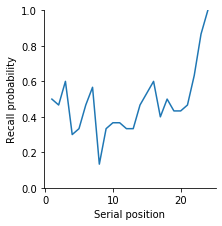

In [2]:
data = pd.read_csv(data_file)
merged = fr.merge_free_recall(data)
fr.plot_spc(fr.spc(merged))

## Test localist benchmark

In [3]:
# target: -1110.9
cmr = models.CMRDistributed()
param = {'B_enc': 0.79, 'B_rec': 0.94, 'w_loc': 1,
         'Afc': 0, 'Acf': 0, 'Aff': 0,
         'Dfc': 70.46, 'Dcf': 100, 'Dff': 2.5,
         'Lfc': 1, 'Lcf': 1, 'P1': 16.84, 'P2': 1.64,
         'T': 4.64, 'X1': 0.0093, 'X2': 0.32, 'B_start': 0.1}
patterns = {'vector': {'loc': np.eye(768)}}
weights = {'fcf': {'loc': 'w_loc'}}
cmr.likelihood(data, param, patterns=patterns, weights=weights)

-1110.8742291846318

In [4]:
# likelihood by list (for debugging)
logl = np.zeros(30)
lists = data['list'].unique()
patterns = {'vector': {'loc': np.eye(24)}}
for i, listno in enumerate(lists):
    list1 = data.loc[data['list'] == listno].copy()
    study_index = list1.loc[list1['trial_type'] == 'study']['item_index']
    full_index = list1['item_index'].to_numpy()
    for j, idx in enumerate(study_index):
        list1.loc[full_index == idx, 'item_index'] = j
    cmr = models.CMRDistributed()
    ll = cmr.likelihood(list1, param, patterns=patterns, weights=weights)
    logl[i] = ll
logl

array([ -89.44595204, -100.22877528,  -25.47942429,  -34.70763813,
        -80.32423429,  -28.47962083,  -16.85544253,  -20.95856819,
        -26.25922214,  -14.94424193,  -32.34119658, -104.18922929,
        -34.10812773,  -29.55362636,  -24.02063001,  -31.28096565,
        -31.9136679 ,  -26.19332468,  -17.80765793,  -57.01606746,
        -73.90126043, -123.98991859, -107.89881103,  -89.33226729,
        -56.86987744,  -69.37670436,  -24.7727888 ,  -84.94338803,
        -71.75697081,  -79.7133924 ])